In [1]:
import numpy as np
import oopcode as oc

In [2]:
hermdrift = oc.Hermite(3,2)

In [3]:
hbeta = np.linalg.solve(hermdrift.transmat, np.array([[0,0,0,0,0,0,-0.1,0,0,2.0],[0,0,0,0,0,0,-2.0,0,0,-0.1]]).T)

In [4]:
def hdrift(x):
    return np.matmul(hermdrift.basis(x), hbeta)

def gradhdrift(x):
    return np.matmul(hermdrift.gradient(x), hbeta)

In [29]:
hdrift(np.array([[1.7, -3.25]]))

array([[-69.14755  ,  -6.3931875]])

In [6]:
def truef(x):
    return np.array([-0.1*x[0]**3 + 2.0*x[1]**3, -2.0*x[0]**3 - 0.1*x[1]**3])

In [30]:
truef(np.array([1.7, -3.25]))

array([-69.14755  ,  -6.3931875])

In [8]:
u = np.array([-1.0, 0.0])
v = np.array([-0.78310075, 0.82685028])

In [9]:
T = 0.5
sigma = 0.05*np.identity(2)
a = np.dot(sigma, sigma.T)

In [10]:
xmat = np.vstack([u, v])

In [11]:
tmat = np.array([0, T])

In [23]:
mybridge = oc.Bridge(100,100,400,method="guided",ncores=2,wantpaths=True)

In [24]:
mybridge.drift = hdrift
mybridge.grad = gradhdrift
mybridge.gvec = np.diag(sigma)
myherm = oc.Hermite(3,2)
mybridge.approx = myherm

In [25]:
samples = mybridge.diffbridge(xmat, tmat)
print(mybridge.meanBurn)
print(mybridge.meanSamp)

0 0 accept
0 1 accept
0 2 accept
0 3 accept
0 4 accept
0 5 accept
0 6 accept
0 7 accept
0 8 accept
0 9 accept
0 10 accept
0 11 accept
0 12 accept
0 13 accept
0 14 accept
0 15 accept
0 16 accept
0 17 accept
0 18 accept
0 19 accept
0 21 accept
0 22 accept
0 23 accept
0 24 accept
0 25 accept
0 26 accept
0 27 accept
0 28 accept
0 29 accept
0 30 accept
0 31 accept
0 32 accept
0 33 accept
0 34 accept
0 35 accept
0 36 accept
0 37 accept
0 38 accept
0 39 accept
0 40 accept
0 41 accept
0 42 accept
0 43 accept
0 44 accept
0 45 accept
0 46 accept
0 47 accept
0 48 accept
0 49 accept
0 50 accept
0 51 accept
0 52 accept
0 53 accept
0 54 accept
0 55 accept
0 59 accept
0 60 accept
0 61 accept
0 62 accept
0 63 accept
0 64 accept
0 65 accept
0 66 accept
0 67 accept
0 68 accept
0 69 accept
0 70 accept
0 71 accept
0 72 accept
0 73 accept
0 74 accept
0 75 accept
0 76 accept
0 77 accept
0 78 accept
0 79 accept
0 80 accept
0 81 accept
0 82 accept
0 83 accept
0 84 accept
0 85 accept
0 86 accept
0 87 accept
0 

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
samples[0].shape

(100, 401, 2)

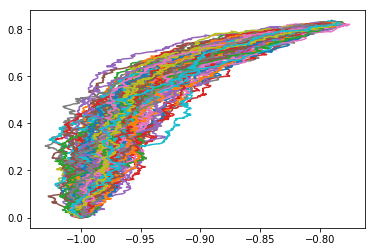

In [28]:
for i in range(100):
    plt.plot(samples[0][i,:,0],samples[0][i,:,1])

plt.show()